 # Supervised Learning: More Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Please read the sklearn documentation if you need to figure out the inputs and outputs of these functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


 ## PART 1: SIMPLE LINEAR REGRESSION



 We'll analyze the relationship between study hours and exam scores using three different methods.

Dataset:
   Hours_Studied  Exam_Score
0            1.5          45
1            2.0          51
2            2.5          58
3            3.0          62
4            3.5          68
5            4.0          73
6            4.5          78
7            5.0          84
8            5.5          88
9            6.0          93


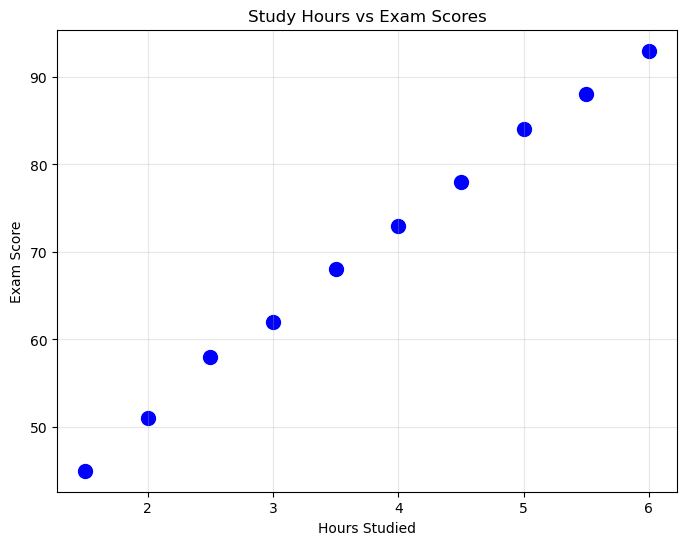

In [2]:
# Dataset: Study Hours vs Exam Scores
data = {
    'Hours_Studied': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Exam_Score': [45, 51, 58, 62, 68, 73, 78, 84, 88, 93]
}
df = pd.DataFrame(data)

print("Dataset:")
print(df)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', s=100)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Scores')
plt.grid(True, alpha=0.3)
plt.show()


 ### TASK 1: Manual Least Squares Calculation



 Calculate the slope (m) and intercept (b) for y = mx + b using the **FIRST 5 DATA POINTS ONLY**.



 **Formulas:**

 - Slope: $m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$

 - Intercept: $b = \frac{\sum y - m\sum x}{n}$

In [6]:
# Use first 5 data points
x_manual = df['Hours_Studied'][:5].values
y_manual = df['Exam_Score'][:5].values

n = len(x_manual)

# Calculate sums needed
sum_x = x_manual.sum()
sum_y = y_manual.sum()
sum_xy = (x_manual * y_manual).sum()
sum_x_squared = (x_manual*2).sum()

# Calculate slope and intercept using formulas above
m_manual = (n*sum_xy - sum_x*sum_y)/ (n*sum_x_squared - (sum_x ** 2))
b_manual = (sum_y - m_manual * sum_x) / n

print("TASK 1 - Manual Calculation (first 5 points):")
print(f"Slope (m): {m_manual}")
print(f"Intercept (b): {b_manual}")
print(f"Equation: y = {m_manual:.2f}x + {b_manual:.2f}\n")

# Make predictions and calculate errors
y_pred_manual = m_manual * x_manual + b_manual
mae_manual = mean_absolute_error(y_manual, y_pred_manual)
mse_manual = mean_squared_error(y_manual, y_pred_manual)

print(f"MAE: {mae_manual:.2f}")
print(f"MSE: {mse_manual:.2f}")


TASK 1 - Manual Calculation (first 5 points):
Slope (m): -4.56
Intercept (b): 68.2
Equation: y = -4.56x + 68.20

MAE: 9.78
MSE: 127.74


 ### TASK 2: NumPy lstsq (Full Dataset)



 Use `np.linalg.lstsq` to find the best fit line for all 10 data points.



 #### Why Add a Column of Ones?



 When we use `np.linalg.lstsq`, we're solving the matrix equation: **Xβ = y**



 For a linear regression equation **y = mx + b**, we need to find both:

 - **m** (slope)

 - **b** (intercept)



 The design matrix must be structured so that matrix multiplication gives us: **b·1 + m·x**



 ```

 Design Matrix (X):        Coefficients (β):     Result (y):

 [1  x₁]                   [b]                   [b·1 + m·x₁]

 [1  x₂]           ×       [m]          =        [b·1 + m·x₂]

 [1  x₃]                                         [b·1 + m·x₃]

 ...

 ```



 **Key Points:**

 - The column of ones multiplies with the intercept **b** to add that constant term to each prediction

 - The column of x values multiplies with the slope **m** to add the variable component

 - **Without the ones column:** We'd only fit lines through the origin (b=0): y = mx

 - **With the ones column:** We can fit any line: y = mx + b

In [7]:
# Prepare the design matrix
# Hint: Use np.column_stack to combine a column of ones with the Hours_Studied values
X_numpy = np.column_stack([np.ones(len(df)), df["Hours_Studied"].values]) 
y_numpy = df['Exam_Score'].values

#Use np.linalg.lstsq
solution, residuals, rank, s = np.linalg.lstsq(X_numpy, y_numpy, rcond=None)
# Extract coefficients
b_numpy = solution[0]
m_numpy = solution[1]

print("TASK 2 - NumPy lstsq (all 10 points):")
print(f"Slope (m): {m_numpy}")
print(f"Intercept (b): {b_numpy}")
print(f"Equation: y = {m_numpy:.2f}x + {b_numpy:.2f}\n")

#  Calculate predictions and errors
y_pred_numpy = np.dot(X_numpy, solution)
mae_numpy = mean_absolute_error(y_numpy, y_pred_numpy)
mse_numpy = mean_squared_error(y_numpy, y_pred_numpy)

print(f"MAE: {mae_numpy:.2f}")
print(f"MSE: {mse_numpy:.2f}")


TASK 2 - NumPy lstsq (all 10 points):
Slope (m): 10.59393939393941
Intercept (b): 30.272727272727234
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 3: Scikit-learn LinearRegression (Full Dataset)



 Use sklearn's `LinearRegression` class.



 **Note:** sklearn automatically handles the intercept internally (with `fit_intercept=True` by default), so we don't need to add a column of ones!

In [11]:
# Reshape X for sklearn (needs 2D array)
X_sklearn = df["Hours_Studied"].values.reshape(-1,1) 
y_sklearn = df['Exam_Score'].values

# Create and fit the model
model = LinearRegression()
#  Fit the model
model.fit(X_sklearn, y_sklearn)

#  Extract coefficients
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print("TASK 3 - Sklearn LinearRegression (all 10 points):")
print(f"Slope (m): {m_sklearn}")
print(f"Intercept (b): {b_sklearn}")
print(f"Equation: y = {m_sklearn:.2f}x + {b_sklearn:.2f}\n")

#  Calculate predictions and errors
y_pred_sklearn = model.predict(X_sklearn)
mae_sklearn = mean_absolute_error(y_sklearn, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_sklearn, y_pred_sklearn)

print(f"MAE: {mae_sklearn:.2f}")
print(f"MSE: {mse_sklearn:.2f}")


TASK 3 - Sklearn LinearRegression (all 10 points):
Slope (m): 10.593939393939388
Intercept (b): 30.272727272727295
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 4: Comparison and Discussion

In [12]:
print("="*70)
print("COMPARISON OF ALL THREE METHODS:")
print("="*70)
print(f"{'Method':<30} {'Slope':<12} {'Intercept':<12} {'MAE':<10} {'MSE':<10}")
print("-"*70)
# TODO: Fill in the comparison table with your results
print(f"{'Manual (5 points)':<30} {m_manual:<12.4f} {b_manual:<12.4f} {mae_manual:<10.2f} {mse_manual:<10.2f}")
print(f"{'NumPy (10 points)':<30} {m_numpy:<12.4f} {b_numpy:<12.4f} {mae_numpy:<10.2f} {mse_numpy:<10.2f}")
print(f"{'Sklearn (10 points)':<30} {m_sklearn:<12.4f} {b_sklearn:<12.4f} {mae_sklearn:<10.2f} {mse_sklearn:<10.2f}")


COMPARISON OF ALL THREE METHODS:
Method                         Slope        Intercept    MAE        MSE       
----------------------------------------------------------------------
Manual (5 points)              -4.5600      68.2000      9.78       127.74    
NumPy (10 points)              10.5939      30.2727      0.61       0.52      
Sklearn (10 points)            10.5939      30.2727      0.61       0.52      


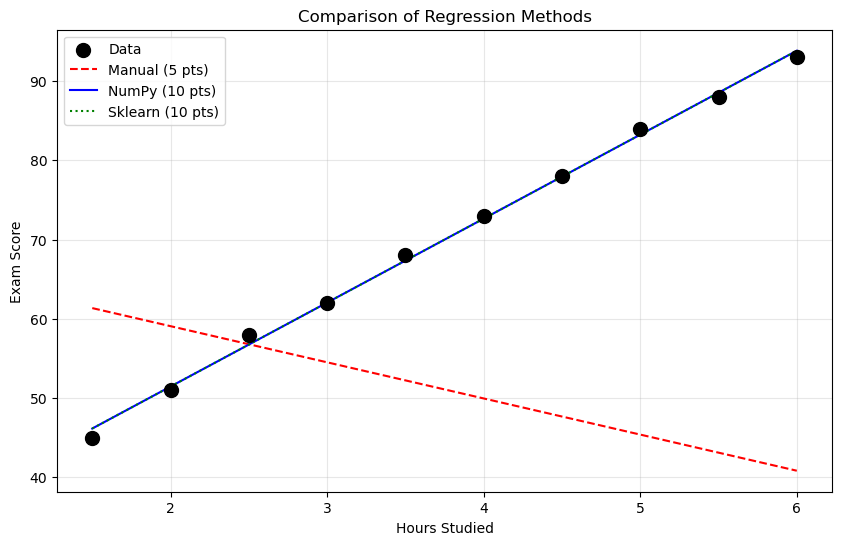

In [13]:
# : Plot all three regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='black', s=100, label='Data', zorder=3)

# : Create x range for plotting
x_range = np.linspace(df["Hours_Studied"].min(), df["Hours_Studied"].max(), 100)

#  Plot each regression line with different styles
# Hint: Use different linestyles: '--', '-', ':'
plt.plot(x_range, m_manual*x_range + b_manual, linestyle='--', color='red', label='Manual (5 pts)')
plt.plot(x_range, m_numpy*x_range + b_numpy, linestyle='-', color='blue', label='NumPy (10 pts)')
plt.plot(x_range, m_sklearn*x_range + b_sklearn, linestyle=':', color='green', label='Sklearn (10 pts)')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


 ### Discussion Questions



 **1. Why do the manual calculations differ from NumPy and sklearn?**



The Manual calculations could differ from NumPy and sklearn because we rounded incorrectly.



 ---



 **2. Why are NumPy and sklearn results nearly identical?**



 NumPy and sklearn both use more precise math to find the least-squares sum, in comparison to manual calculations. Therefore, their numbers would be very close, and almost exact.



 ---



 **3. Which method produced the lowest error? Why?**


NumPy and sklearn have the lowest mean absolute errors and mean sqaured errors, because they use the most precise math methods.



 ---

 ## PART 2: MULTIPLE LINEAR REGRESSION



 Now we'll predict house prices using multiple features.

In [14]:
# Dataset: House Prices
house_data = {
    'Size_sqft': [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500,
                  1300, 1600, 1900, 2100, 2400, 2600, 2900, 3100, 3300, 3600],
    'Bedrooms': [2, 3, 3, 3, 4, 4, 4, 4, 5, 5,
                 2, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'Age_years': [15, 20, 10, 5, 8, 3, 12, 6, 15, 2,
                  18, 12, 8, 10, 5, 7, 4, 9, 11, 1],
    'Price_1000s': [180, 210, 250, 280, 310, 350, 360, 400, 420, 480,
                    190, 230, 270, 300, 340, 370, 390, 430, 450, 510]
}
house_df = pd.DataFrame(house_data)

print("House Price Dataset:")
print(house_df)


House Price Dataset:
    Size_sqft  Bedrooms  Age_years  Price_1000s
0        1200         2         15          180
1        1500         3         20          210
2        1800         3         10          250
3        2000         3          5          280
4        2200         4          8          310
5        2500         4          3          350
6        2800         4         12          360
7        3000         4          6          400
8        3200         5         15          420
9        3500         5          2          480
10       1300         2         18          190
11       1600         3         12          230
12       1900         3          8          270
13       2100         4         10          300
14       2400         4          5          340
15       2600         4          7          370
16       2900         4          4          390
17       3100         5          9          430
18       3300         5         11          450
19       3600      

 ### TASK 5: Justify Multiple Linear Regression



 Calculate correlations to understand relationships between features and price.

In [15]:
print("Correlations with Price:")
#Calculate correlation between each feature and price
for col in ['Size_sqft', 'Bedrooms', 'Age_years']:
    corr = house_df[col].corr(house_df['Price_1000s'])
    print(f"{col}: {corr:.3f}")


Correlations with Price:
Size_sqft: 0.995
Bedrooms: 0.944
Age_years: -0.622


 **Why should we use multiple linear regression instead of simple linear regression?**



 *YOUR ANSWER:*



 ---

 ### TASK 6: Implement Multiple Linear Regression

In [16]:
# Prepare features and target
X_multi = house_df[['Size_sqft', 'Bedrooms', 'Age_years']]  
y_multi = house_df['Price_1000s']                            

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# Extract coefficients
coefficients = mlr_model.coef_  
intercept = mlr_model.intercept_

print("Model Coefficients:")
print(f"Intercept: {intercept:.2f}")
for i, col in enumerate(X_multi.columns):
    print(f"{col}: {coefficients[i]:.2f}")  

print("\nModel Equation:")
print(f"Price = {intercept:.2f} + {coefficients[0]:.2f}*Size + "
      f"{coefficients[1]:.2f}*Bedrooms + {coefficients[2]:.2f}*Age")

Model Coefficients:
Intercept: 35.30
Size_sqft: 0.11
Bedrooms: 9.74
Age_years: -1.47

Model Equation:
Price = 35.30 + 0.11*Size + 9.74*Bedrooms + -1.47*Age


 ### TASK 7: Calculate and Interpret Errors

In [17]:
# Calculate training errors (how far were predictions from the real prices)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# TODO: Calculate testing errors (how far were predictions from the real prices)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Training Set Performance:")
print(f"MAE: ${train_mae:.2f}k")  
print(f"MSE: ${train_mse:.2f}k²")
print(f"RMSE: ${train_rmse:.2f}k")  

print("\nTest Set Performance:")
print(f"MAE: ${test_mae:.2f}k")  
print(f"MSE: ${test_mse:.2f}k²")  
print(f"RMSE: ${test_rmse:.2f}k")  


Training Set Performance:
MAE: $5.96k
MSE: $62.80k²
RMSE: $7.92k

Test Set Performance:
MAE: $8.43k
MSE: $78.30k²
RMSE: $8.85k


 ### TASK 8: Visualize Results

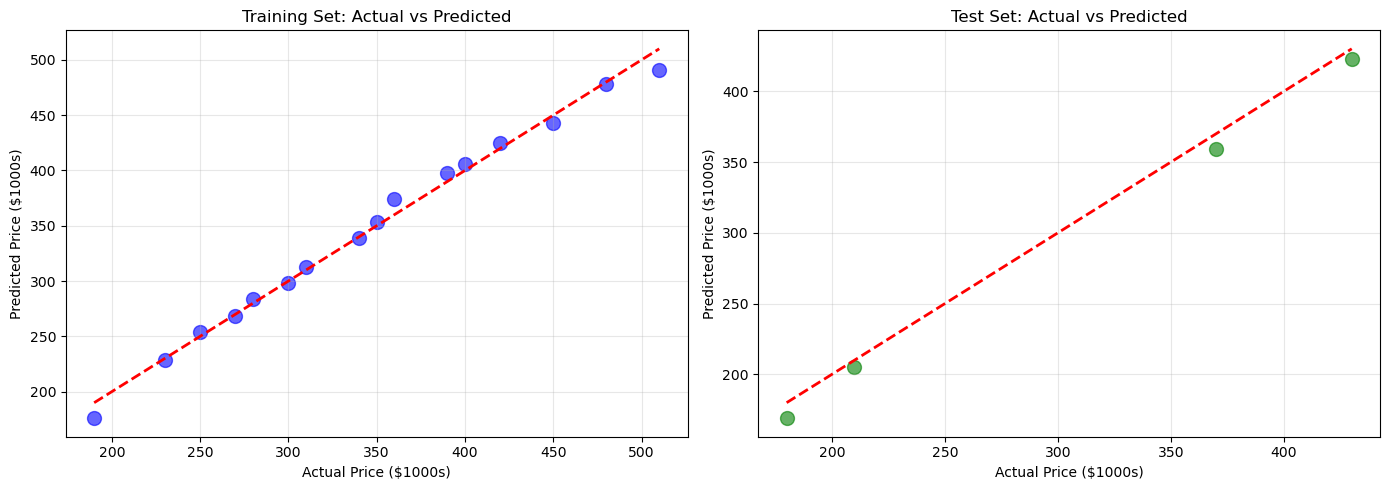

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=100, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($1000s)')
axes[0].set_ylabel('Predicted Price ($1000s)')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Testing set
# TODO: Complete the test set plot
axes[1].scatter(y_test, y_test_pred, alpha = 0.6, s=100, color = 'green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 2)
axes[1].set_xlabel('Actual Price ($1000s)')
axes[1].set_ylabel('Predicted Price ($1000s)')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
#test



 ### Final Discussion Questions



 **1. How do the training and test errors compare? What does this tell you? (Recall our discussion on overfitting and underfitting from last week)**



Both the training and test set errors are low, which shows that our model fits the data well without overfitting or slight underfitting.



 ---



 **2. Which feature has the strongest effect on house price? How can you tell?**



Size_sqft has the strongest effect on house price, because it has the largest coefficient, and its price coorelation is the greatest.



 ---



 **3. What is one limitation of this model?**



 The model only has linear trend lines, so if there was a trend that was exponential, or quadratic, it wouldn't show this trend as accuractely.



 ---